In [58]:
import pandas as pd

In [59]:
# Ajusta el número máximo de filas y columnas impresas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Ajusta el ancho de la columna para que se muestren más caracteres en cada celda
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTKv5ve5cbcTUOygS_FEd-swTOTVxC4DldFq-T2W4nPW-XqMYK8rVrMn_RDwf_ujF8o_1YyHAL98OiO/pub?gid=1414694331&single=true&output=csv')
print(df)

        ANIO  MES  NSELV  UBIGEO  Parentesco_con_jefe_hogar  sexo  edad  \
0       2020    1     10  240201                          1   1.0  43.0   
1       2020    1     10  240201                          2   2.0  43.0   
2       2020    1     10  240201                          3   2.0  11.0   
3       2020    1     10  240201                          3   1.0  22.0   
4       2020    1     10  240201                          4   1.0  27.0   
...      ...  ...    ...     ...                        ...   ...   ...   
111530  2019   11     59  150133                          1   2.0  69.0   
111531  2019   11     96  150133                          1   1.0  52.0   
111532  2019   11     96  150133                          2   2.0  48.0   
111533  2019   11     96  150133                          3   2.0  25.0   
111534  2019   11     96  150133                          3   1.0  20.0   

        idioma_ninez  nivel_educativo  centro_estudios_E_P  
0                4.0              6.0 

In [60]:
# buscar en la columna 'UBIGEO' el numero de juliaca '211101'
ubigeo_juliaca = df[df['UBIGEO'] == 211101]
print(ubigeo_juliaca)

# buscar en la columna 'UBIGEO' el numero de puno '211101'
ubigeo_puno = df[df['UBIGEO'] == 210101]
print(ubigeo_puno)

res_todo_puno = df[df["UBIGEO"].astype(str).str.startswith("21")]
print("res_todo_puno",res_todo_puno)

        ANIO  MES  NSELV  UBIGEO  Parentesco_con_jefe_hogar  sexo  edad  \
86530   2019    7     14  211101                          1   1.0  71.0   
86531   2019    7     14  211101                          2   2.0  70.0   
86532   2019    7     14  211101                          3   1.0  33.0   
86533   2019    7     14  211101                          3   1.0  30.0   
86534   2019    7     28  211101                          1   1.0  33.0   
86535   2019    7     28  211101                          2   2.0  28.0   
86536   2019    7     28  211101                          3   2.0  13.0   
86537   2019    7     28  211101                          3   1.0   3.0   
86538   2019    7     60  211101                          1   2.0  25.0   
86539   2019    7     87  211101                          1   1.0  40.0   
86540   2019    7     87  211101                          2   2.0  38.0   
86541   2019    7     87  211101                          3   2.0   7.0   
86542   2019    7     87 

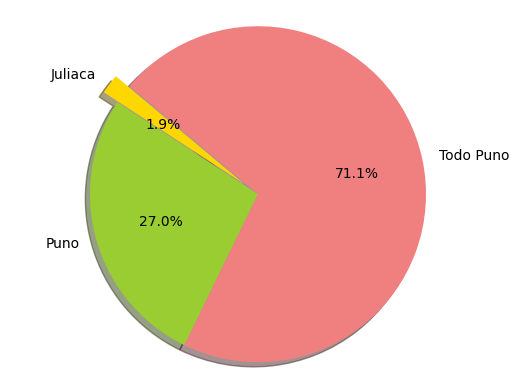

In [61]:
# quiero un grafico tipo pastel de juliaca, puno y todo puno
import matplotlib.pyplot as plt

# Data to plot
labels = 'Juliaca', 'Puno', 'Todo Puno'
sizes = [ubigeo_juliaca.shape[0], ubigeo_puno.shape[0], res_todo_puno.shape[0]]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [62]:
# Filtrar los registro de puno y juliaca
df_puno_y_juliaca = df[(df['UBIGEO'] == 211101) | (df['UBIGEO'] == 210101)]
print(df_puno_y_juliaca[['idioma_ninez']])

        idioma_ninez
86530            NaN
86531            NaN
86532            NaN
86533            NaN
86534            NaN
...              ...
110480           NaN
110481           NaN
110482           NaN
110483           NaN
110484           NaN

[2873 rows x 1 columns]


In [63]:
# # obtenemos la cantidad de hogares que en su niñez apredieron uno de los siguientes idiomas: quechua, aymara y castellano.
 #atravez de la columna 'idioma_ninez'
cantidad_hogares_quechua = df_puno_y_juliaca[df_puno_y_juliaca['idioma_ninez'] == '1']
cantidad_hogares_aymara = df_puno_y_juliaca[df_puno_y_juliaca['idioma_ninez'] == '2']
cantidad_hogares_castellano = df_puno_y_juliaca[df_puno_y_juliaca['idioma_ninez'] == '4']
print("cantidad_hogares_quechua", len(cantidad_hogares_quechua))
print("cantidad_hogares_aymara", len(cantidad_hogares_aymara))
print("cantidad_hogares_castellano", len(cantidad_hogares_castellano))

# # quiero un grafico tipo pastel de los idiomas que se aprendieron en la niñez
# # Data to plot
# labels = 'Quechua', 'Aymara', 'Castellano'
# sizes = [len(cantidad_hogares_quechua), len(cantidad_hogares_aymara), len(cantidad_hogares_castellano)]
# colors = ['gold', 'yellowgreen', 'lightcoral']
# explode = (0.1, 0, 0)  # explode 1st slice
# plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()

cantidad_hogares_quechua 0
cantidad_hogares_aymara 0
cantidad_hogares_castellano 0


In [64]:
# Ahora, obtenemos el numero de damas y varones en puno y juliaca de acuerdo a la columna 'sexo'
# 1 = varon
# 2 = mujer
cantidad_varones = df_puno_y_juliaca[df_puno_y_juliaca['sexo'] == 1]
cantidad_mujeres = df_puno_y_juliaca[df_puno_y_juliaca['sexo'] == 2]
cantidad_varones_juliaca = cantidad_varones[cantidad_varones['UBIGEO'] == 211101]
cantidad_mujeres_juliaca = cantidad_mujeres[cantidad_mujeres['UBIGEO'] == 211101]
cantidad_varones_puno = cantidad_varones[cantidad_varones['UBIGEO'] == 210101]
cantidad_mujeres_puno = cantidad_mujeres[cantidad_mujeres['UBIGEO'] == 210101]
cantidad_total = len(cantidad_varones) + len(cantidad_mujeres)
print("cantidad_varones_juliaca", len(cantidad_varones_juliaca))
print("cantidad_mujeres_juliaca", len(cantidad_mujeres_juliaca))
print("cantidad_varones_puno", len(cantidad_varones_puno))
print("cantidad_mujeres_puno", len(cantidad_mujeres_puno))
print("cantidad_varones", len(cantidad_varones))
print("cantidad_mujeres", len(cantidad_mujeres))
print("cantidad_total", cantidad_total)



cantidad_varones_juliaca 94
cantidad_mujeres_juliaca 94
cantidad_varones_puno 1234
cantidad_mujeres_puno 1380
cantidad_varones 1328
cantidad_mujeres 1474
cantidad_total 2802


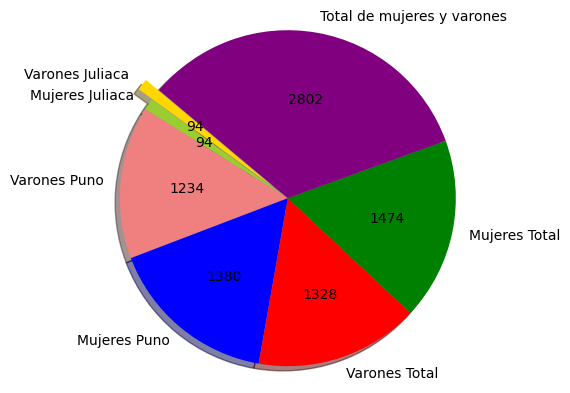

In [65]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Varones Juliaca', 'Mujeres Juliaca', 'Varones Puno', 'Mujeres Puno', 'Varones Total', 'Mujeres Total', 'Total de mujeres y varones']
sizes = [len(cantidad_varones_juliaca), len(cantidad_mujeres_juliaca), len(cantidad_varones_puno), len(cantidad_mujeres_puno), len(cantidad_varones), len(cantidad_mujeres), cantidad_total]
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue', 'red', 'green', 'purple']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Varones Juliaca')

# Define a custom function to display the absolute values
def absolute_value(val, sizes):
    a  = np.round(val/100.*np.sum(sizes), 0)
    return int(a)

autopct = lambda val: absolute_value(val, sizes)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct, shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [66]:
# Elimina filas que contengan NaN es cualquiera de sus columnas
data_puno_juliaca_none = df_puno_y_juliaca.dropna()
#print("data_puno_juliaca",data_puno_juliaca_none)

# Rellena valores NaN con 0 en todas las columnas
data_puno_juliaca_n0 = df_puno_y_juliaca.fillna(0)
print("data_puno_juliaca_n0",data_puno_juliaca_n0.head(50))

data_puno_juliaca_n0        ANIO  MES  NSELV  UBIGEO  Parentesco_con_jefe_hogar  sexo  edad  \
86530  2019    7     14  211101                          1   1.0  71.0   
86531  2019    7     14  211101                          2   2.0  70.0   
86532  2019    7     14  211101                          3   1.0  33.0   
86533  2019    7     14  211101                          3   1.0  30.0   
86534  2019    7     28  211101                          1   1.0  33.0   
86535  2019    7     28  211101                          2   2.0  28.0   
86536  2019    7     28  211101                          3   2.0  13.0   
86537  2019    7     28  211101                          3   1.0   3.0   
86538  2019    7     60  211101                          1   2.0  25.0   
86539  2019    7     87  211101                          1   1.0  40.0   
86540  2019    7     87  211101                          2   2.0  38.0   
86541  2019    7     87  211101                          3   2.0   7.0   
86542  2019    7 

In [73]:
# Niños entre 4 y 11 años que hablan fluidamente quechua y aymara

# Creamos el filtro de edad el cual busca los niños entre 4 y 11 años
filtro_edad = (df['edad'] >= 4) & (df['edad'] <= 11)
# Creamos el filtro de idioma el filtra los niños que hablan quechua o aymara
filtro_idioma = (df['idioma_ninez'] == 1) | (df['idioma_ninez'] == 2)
ninos_filtrados = res_todo_puno.loc[filtro_edad & filtro_idioma]

print("Filas: ",len(ninos_filtrados))

Filas:  28


In [75]:
# Filtramos el sexo de los niños que hablan quechua y aymara
ninos_filtrados_varones = ninos_filtrados[ninos_filtrados['sexo'] == 1]
ninos_filtrados_mujeres = ninos_filtrados[ninos_filtrados['sexo'] == 2]
niños_filtrados_quechua_mujeres = ninos_filtrados_mujeres[ninos_filtrados_mujeres['idioma_ninez'] == 1]
niños_filtrados_aymara_mujeres = ninos_filtrados_mujeres[ninos_filtrados_mujeres['idioma_ninez'] == 2]
niños_filtrados_quechua_varones = ninos_filtrados_varones[ninos_filtrados_varones['idioma_ninez'] == 1]
niños_filtrados_aymara_varones = ninos_filtrados_varones[ninos_filtrados_varones['idioma_ninez'] == 2]

print("Niños que hablan quechua y aymara")
print("Varones que hablan quechua: ",len(niños_filtrados_quechua_varones))
print("Mujeres que hablan quechua: ",len(niños_filtrados_quechua_mujeres))
print("Varones que hablan aymara: ",len(niños_filtrados_aymara_varones))
print("Mujeres que hablan aymara: ",len(niños_filtrados_aymara_mujeres))
print("Varones: ",len(ninos_filtrados_varones))
print("Mujeres: ",len(ninos_filtrados_mujeres))


Niños que hablan quechua y aymara
Varones que hablan quechua:  8
Mujeres que hablan quechua:  12
Varones que hablan aymara:  6
Mujeres que hablan aymara:  2
Varones:  14
Mujeres:  14


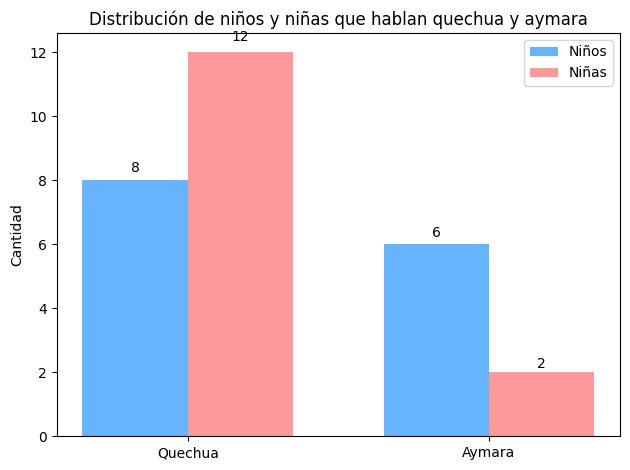

In [83]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Quechua', 'Aymara']
men_sizes = [len(niños_filtrados_quechua_varones), len(niños_filtrados_aymara_varones)]
women_sizes = [len(niños_filtrados_quechua_mujeres), len(niños_filtrados_aymara_mujeres)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_sizes, width, label='Niños', color='#66b3ff')
rects2 = ax.bar(x + width/2, women_sizes, width, label='Niñas', color='#ff9999')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de niños y niñas que hablan quechua y aymara')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add value annotations
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()